### Tratamento do texto do campo DECISAO do dataset de Acórdãos rotulados

In [2]:
import os, signal

import pandas as pd
import pyperclip as pc
import texthero as hero
import modanez_tools as mt
import matplotlib.pyplot as plt

from datetime import datetime
# from utils import highlight_regex_matches as hl

In [3]:
df_rotulados = mt.read_file('dados/df_rotulados.csv')
# df_rotulados.info()

Duration: 0:00:00.236879


In [5]:
# Aplicação do regex no texto do dataset dos etiquetados
start_time = datetime.now()
df_rotulados['PROCESSADO'] = df_rotulados.apply(lambda x: mt.padronizacao(x), axis = 1)
print('Duration: {}'.format(datetime.now() - start_time))

Duration: 0:02:31.031875


In [6]:
# df_rotulados.drop(['DECISAO'], axis=1)
mt.save_file(df_rotulados.drop(['DECISAO'], axis=1),'dados/df_rotulados_proc.csv')

Duration: 0:00:00.265064


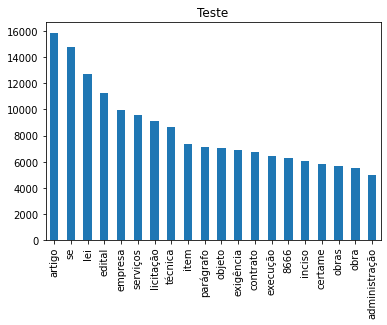

In [8]:
top_20 = hero.visualization.top_words(hero.remove_punctuation(df_rotulados.PROCESSADO)).head(20)

top_20.plot.bar(rot=90, title='Teste')

plt.show(block=True)

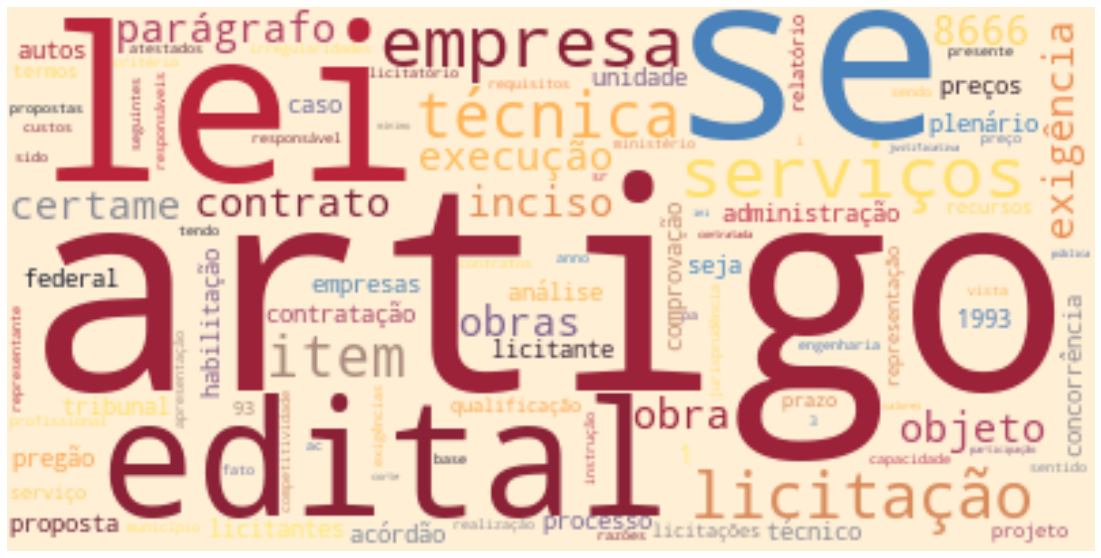

In [9]:
hero.wordcloud(hero.remove_punctuation(df_rotulados.PROCESSADO), max_words=100)

In [10]:
# pc.copy(df_rotulados.iloc[177].DECISAO)

In [11]:
os.kill(os.getpid(), signal.SIGKILL)

In [4]:
df = pd.DataFrame(df_rotulados.groupby(['ID', 'DECISAO'])['LABEL_A','LABEL_B', 'LABEL_C'].apply(lambda x: tuple(x.values)))
df.reset_index(inplace=True)
df = df.rename(columns={0: 'LABELS'})

for index, row in df.iterrows():
    df.iloc[index].LABELS = ','.join([str(elem) for elem in df.iloc[index].LABELS[0]])

df

/tmp/xpython_426393/951069034.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = pd.DataFrame(df_rotulados.groupby(['ID', 'DECISAO'])['LABEL_A','LABEL_B', 'LABEL_C'].apply(lambda x: tuple(x.values)))


,ID,DECISAO,LABELS
0,AC-000035-2018-PL,"<p>VISTOS, relatados e discutidos estes autos ...","1,2,0"
1,AC-000043-2008-PL,"Vistos, relatados e discutidos estes autos Rep...","7,0,0"
2,AC-000103-2009-PL,"<p>VISTOS, relatados e discutidos estes autos ...","7,0,0"
3,AC-000107-2009-PL,"<p class=""body_Text_Indent_3"">VISTOS, relatado...","2,0,0"
4,AC-000111-2016-PL,"<p>VISTOS, relatados e discutidos estes autos ...","7,0,0"
...,...,...,...
325,DE-000512-2002-2C,"A Segunda Câmara, diante das razões expostas ...","7,0,0"
326,DE-000681-1998-PL,"O Tribunal Pleno, diante das razões expostas ...","2,0,0"
327,DE-000767-1998-PL,"O Tribunal Pleno, diante da razões exposta pe...","2,0,0"
328,DE-001025-2001-PL,"O Tribunal Pleno, diante das razões expostas ...","5,0,0"


In [5]:
new_cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
new_vals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df = df.reindex(columns=df.columns.tolist()+new_cols)
df[new_cols] = new_vals
df

,ID,DECISAO,LABELS,1,2,3,4,5,6,7,8,9,10,11
0,AC-000035-2018-PL,"<p>VISTOS, relatados e discutidos estes autos ...","1,2,0",0,0,0,0,0,0,0,0,0,0,0
1,AC-000043-2008-PL,"Vistos, relatados e discutidos estes autos Rep...","7,0,0",0,0,0,0,0,0,0,0,0,0,0
2,AC-000103-2009-PL,"<p>VISTOS, relatados e discutidos estes autos ...","7,0,0",0,0,0,0,0,0,0,0,0,0,0
3,AC-000107-2009-PL,"<p class=""body_Text_Indent_3"">VISTOS, relatado...","2,0,0",0,0,0,0,0,0,0,0,0,0,0
4,AC-000111-2016-PL,"<p>VISTOS, relatados e discutidos estes autos ...","7,0,0",0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,DE-000512-2002-2C,"A Segunda Câmara, diante das razões expostas ...","7,0,0",0,0,0,0,0,0,0,0,0,0,0
326,DE-000681-1998-PL,"O Tribunal Pleno, diante das razões expostas ...","2,0,0",0,0,0,0,0,0,0,0,0,0,0
327,DE-000767-1998-PL,"O Tribunal Pleno, diante da razões exposta pe...","2,0,0",0,0,0,0,0,0,0,0,0,0,0
328,DE-001025-2001-PL,"O Tribunal Pleno, diante das razões expostas ...","5,0,0",0,0,0,0,0,0,0,0,0,0,0
